# Predicting if a child enjoys school

### Used Columns
#### TA3: Test child: Ever school, TA4: Test child: Class, TA6: Test child: Teacher nice, TA8B:  Test: Reading level, TA9B: Test: Math level, TA10B: Test: Writing level, CS4: School type, CS5: School distance (Km), CS6: Standard (years) <1=0, CS7: Course of study if above 10 standard, CS8: Medium of instruction, CS9: Year English taught, CS10: School hours/week, CS11: Homework hours/week, CS13: Days/month absent

### Target Variable - TA5: Test child: Enjoys school


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Preprocessing

In [2]:
data = pd.read_csv('Data.tsv', delimiter='\t')

C:\Users\AKASH KUMAR SAH\AppData\Local\Temp\ipykernel_42528\1225700478.py:1: DtypeWarning: Columns (0,6,9,10,11,12,13,14,15,16,17,18,22,27,29,33,34,39,44,48,49,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,74,75,76,78,79,80,88,91,105,150,151,152,154,158,159,166,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,194,196,197,198,199,200,201,202,203,204,205,217,218,219,220,221,222,223,224,225,226,227,228,229,230,234,235,236,237,240,241,243,245,247,248,249,250,275,279,283,287,288,289,290,291,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,320,322,334) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Data.tsv', delimiter='\t')


In [3]:
data.head()

,SURVEY,STATEID,DISTID,PSUID,HHID,HHSPLITID,PERSONID,IDPSU,IDHH,IDPERSON,...,MG8,MG9NM,MG10,MG11,MGYEAR5,NMIG5,MGMONTHS5,MGYEAR1,NMIG1,MGMONTHS1
0,2,1,2,1,10,1,1,10201,102010101,10201010101,...,,,,,0,,,0,,
1,2,1,2,1,10,1,2,10201,102010101,10201010102,...,,,,,0,,,0,,
2,2,1,2,1,10,1,3,10201,102010101,10201010103,...,,,,,0,,,0,,
3,2,1,2,1,10,1,4,10201,102010101,10201010104,...,,,,,0,,,0,,
4,2,1,2,1,10,1,5,10201,102010101,10201010105,...,,,,,0,,,0,,


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204569 entries, 0 to 204568
Columns: 337 entries, SURVEY to MGMONTHS1
dtypes: int64(9), object(328)
memory usage: 526.0+ MB


In [5]:
data = data.loc[:, ['TA3', 'TA4', 'TA6', 'TA8B', 'TA9B', 'TA10B', 'CS4', 'CS5', 'CS6', 'CS7', 'CS8', 'CS9', 'CS10', 'CS11', 'CS13', 'TA5']]

In [6]:
data.head()

,TA3,TA4,TA6,TA8B,TA9B,TA10B,CS4,CS5,CS6,CS7,CS8,CS9,CS10,CS11,CS13,TA5
0,,,,,,,,,,,,,,,,
1,,,,,,,,,,,,,,,,
2,,,,,,,,,,,,,,,,
3,,,,,,,4,3,6,,11,0,6,2,2,
4,,,,,,,,,,,,,,,,


In [7]:
data.describe()

,TA3,TA4,TA6,TA8B,TA9B,TA10B,CS4,CS5,CS6,CS7,CS8,CS9,CS10,CS11,CS13,TA5
count,204569,204569,204569,204569,204569,204569,204569,204569,204569,204569,204569,204569,204569,204569,204569,204569
unique,4,11,4,6,5,4,14,69,18,13,15,16,72,56,32,3
top,,,,,,,,,,,,,,,,
freq,192421,192581,192609,192712,192763,192832,149961,150160,149962,193352,156856,157524,157210,157587,158003,192596


In [8]:
data=data[(data['TA3']!=' ') & (data['TA3']!='0') &(data['TA5']!=' ')]

In [9]:
data.describe()

,TA3,TA4,TA6,TA8B,TA9B,TA10B,CS4,CS5,CS6,CS7,CS8,CS9,CS10,CS11,CS13,TA5
count,11973,11973,11973,11973,11973,11973,11973,11973,11973,11973,11973,11973,11973,11973,11973,11973
unique,2,10,4,6,5,4,8,33,14,4,15,14,65,43,31,2
top,1,4,1,4,1,2,2,1,4,,1,1,36,6,0,1
freq,11912,2649,9943,4208,4247,4479,6938,8908,2601,11966,5614,4872,5132,2492,3613,11642


In [10]:
data=data.replace(' ', '-1')

In [11]:
data.describe()

,TA3,TA4,TA6,TA8B,TA9B,TA10B,CS4,CS5,CS6,CS7,CS8,CS9,CS10,CS11,CS13,TA5
count,11973,11973,11973,11973,11973,11973,11973,11973,11973,11973,11973,11973,11973,11973,11973,11973
unique,2,10,4,6,5,4,8,33,14,4,15,14,65,43,31,2
top,1,4,1,4,1,2,2,1,4,-1,1,1,36,6,0,1
freq,11912,2649,9943,4208,4247,4479,6938,8908,2601,11966,5614,4872,5132,2492,3613,11642


In [12]:
data=data.astype(float)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11973 entries, 18 to 204560
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TA3     11973 non-null  float64
 1   TA4     11973 non-null  float64
 2   TA6     11973 non-null  float64
 3   TA8B    11973 non-null  float64
 4   TA9B    11973 non-null  float64
 5   TA10B   11973 non-null  float64
 6   CS4     11973 non-null  float64
 7   CS5     11973 non-null  float64
 8   CS6     11973 non-null  float64
 9   CS7     11973 non-null  float64
 10  CS8     11973 non-null  float64
 11  CS9     11973 non-null  float64
 12  CS10    11973 non-null  float64
 13  CS11    11973 non-null  float64
 14  CS13    11973 non-null  float64
 15  TA5     11973 non-null  float64
dtypes: float64(16)
memory usage: 1.6 MB


In [14]:
from sklearn.model_selection import train_test_split
X=data.drop(['TA5'], axis=1)
y=data['TA5']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,  random_state=2022, stratify=y)

In [15]:
print("X_train:", X_train.shape) # X_train
print("X_test:", X_test.shape) # X_test
print("y_train:", y_train.shape) # y_train
print("y_test:", y_test.shape) # y_test


X_train: (8381, 15)
X_test: (3592, 15)
y_train: (8381,)
y_test: (3592,)


In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

classifier= LogisticRegression(random_state=2021)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)

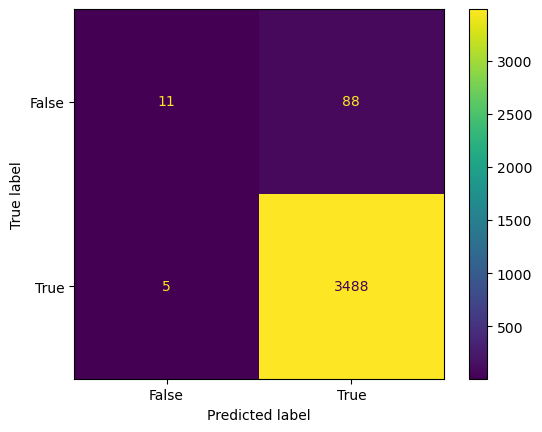

In [18]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, roc_auc_score, roc_curve, f1_score

c_matrix=confusion_matrix(y_test, y_pred)
c_matrix_dis = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=[False, True])
c_matrix_dis.plot()
plt.show()

In [19]:
cl_report = classification_report(y_test, y_pred)
print(cl_report)
print(f1_score(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.69      0.11      0.19        99
         1.0       0.98      1.00      0.99      3493

    accuracy                           0.97      3592
   macro avg       0.83      0.55      0.59      3592
weighted avg       0.97      0.97      0.96      3592

0.9868439666147971


In [20]:
accuracy_score(y_test, y_pred)

0.9741091314031181

In [21]:
y_prob = classifier.predict_proba(X_test)
roc_auc_score(y_test, y_prob[:, 1])

0.808378662086077

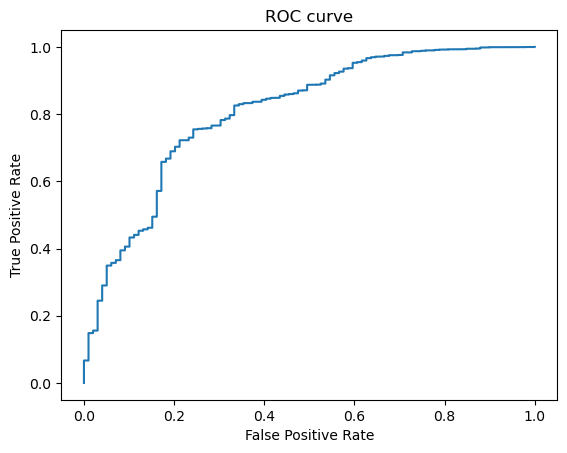

In [22]:
fpr, tpr, thresh = roc_curve(y_test, y_prob[:, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.plot(fpr, tpr)


In [23]:
## cv=5
from sklearn.model_selection import cross_val_score

scores = cross_val_score(classifier, X_train, y_train, cv=5)
print('Cross-Validation Accuracy Scores', scores)
scores = pd.Series(scores)
print(scores.min(), scores.mean(), scores.max())


Cross-Validation Accuracy Scores [0.97257007 0.97315036 0.97434368 0.97315036 0.97315036]
0.9725700655933214 0.9732729629993326 0.9743436754176611


# SVM

In [24]:
from sklearn.svm import SVC

svmclass = SVC(random_state=2022, C=5, gamma='scale', kernel='rbf', probability=True)
svmclass.fit(X_train, y_train)
y_pred2 = svmclass.predict(X_test)
y_prob2 = svmclass.predict_proba(X_test)


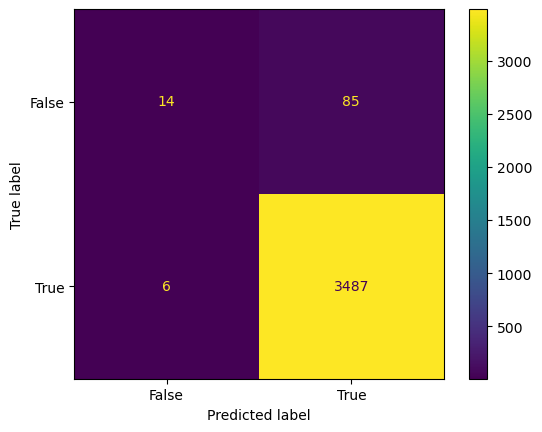

In [25]:
c_matrix=confusion_matrix(y_test, y_pred2)
c_matrix_dis = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=[False, True])
c_matrix_dis.plot()
plt.show()


In [26]:
cl_report = classification_report(y_test, y_pred2)
print(cl_report) 

              precision    recall  f1-score   support

         0.0       0.70      0.14      0.24        99
         1.0       0.98      1.00      0.99      3493

    accuracy                           0.97      3592
   macro avg       0.84      0.57      0.61      3592
weighted avg       0.97      0.97      0.97      3592



In [27]:
accuracy_score(y_test, y_pred2)


0.9746659242761693

In [28]:
roc_auc_score(y_test, y_prob2[:, 1])

0.6054215212531846

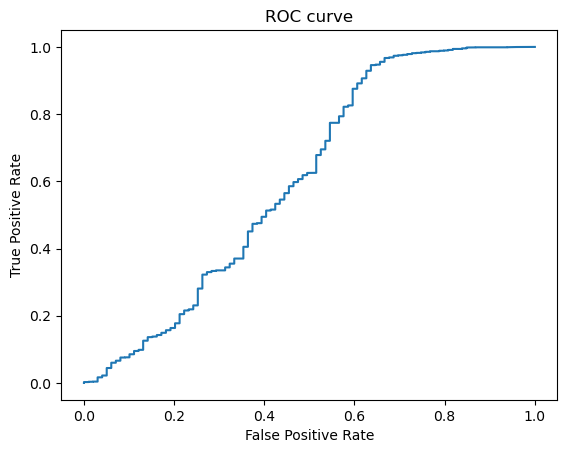

In [29]:
fpr, tpr, thresh = roc_curve(y_test, y_prob2[:, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.plot(fpr, tpr)

In [30]:
scores = cross_val_score(svmclass, X_train, y_train, cv=5)
print('Cross-Validation Accuracy Scores', scores)
scores = pd.Series(scores)
print(scores.min(), scores.mean(), scores.max())



Cross-Validation Accuracy Scores [0.97257007 0.97315036 0.97315036 0.97136038 0.9725537 ]
0.9713603818615751 0.9725569725458719 0.9731503579952268


# Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred3 = rf.predict(X_test)
y_prob3 = rf.predict_proba(X_test)

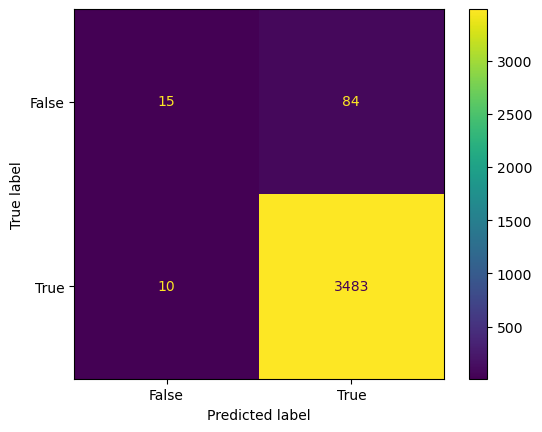

In [32]:
c_matrix=confusion_matrix(y_test, y_pred3)
c_matrix_dis = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=[False, True])
c_matrix_dis.plot()
plt.show()


In [33]:
cl_report = classification_report(y_test, y_pred3)
print(cl_report) 
print(f1_score(y_test, y_pred3))

              precision    recall  f1-score   support

         0.0       0.60      0.15      0.24        99
         1.0       0.98      1.00      0.99      3493

    accuracy                           0.97      3592
   macro avg       0.79      0.57      0.61      3592
weighted avg       0.97      0.97      0.97      3592

0.986685552407932


In [34]:
accuracy_score(y_test, y_pred3)


0.9738307349665924

In [35]:
roc_auc_score(y_test, y_prob3[:, 1])

0.7236464270532407

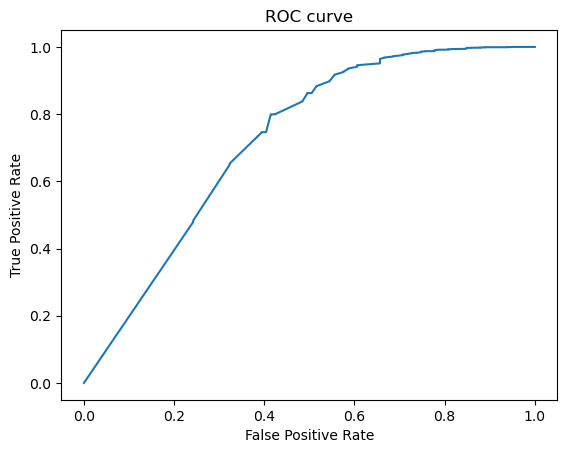

In [36]:
fpr, tpr, thresh = roc_curve(y_test, y_prob3[:, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.plot(fpr, tpr)